In [ ]:
!pip install opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# First import the libraries cv2 and matplotlib
import cv2
import matplotlib.pyplot as plt
image_name = "/content/drive/MyDrive/MLPR - Y4T3/messi.jpg"
# Read an image file using cv2
img = cv2.imread(image_name)
type(img)

numpy.ndarray

In [ ]:
print(img.shape)

(345, 552, 3)


In [ ]:
print(img)

[[[140 138 137]
  [ 80  81  79]
  [ 55  54  56]
  ...
  [ 46  53  50]
  [ 80  85  83]
  [134 139 137]]

 [[143 141 140]
  [ 64  64  64]
  [ 40  42  43]
  ...
  [ 43  50  47]
  [ 58  63  61]
  [138 143 141]]

 [[149 149 149]
  [ 60  60  60]
  [ 43  45  46]
  ...
  [ 49  56  53]
  [ 55  60  58]
  [149 154 152]]

 ...

 [[137 152 144]
  [ 67  86  77]
  [ 89 110 101]
  ...
  [107 125 112]
  [ 82  93  83]
  [154 163 153]]

 [[117 126 123]
  [ 54  66  60]
  [ 72  88  81]
  ...
  [ 72  86  74]
  [ 50  58  48]
  [126 131 122]]

 [[166 171 170]
  [126 133 130]
  [147 156 153]
  ...
  [148 157 147]
  [116 118 112]
  [177 177 171]]]


In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
plt.figure(figsize=(8,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
plt.axis('off')
plt.show()

In [ ]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img2)


[[138  80  55 ...  51  84 138]
 [141  64  42 ...  48  62 142]
 [149  60  45 ...  54  59 153]
 ...
 [148  81 105 ... 119  89 159]
 [124  63  84 ...  81  54 128]
 [170 131 154 ... 153 116 175]]


In [ ]:
image_name = "/content/drive/MyDrive/MLPR - Y4T3/lion.webp"
# Read an image file using cv2
img = cv2.imread(image_name)
type(img)

numpy.ndarray

In [ ]:
print(img.shape)


(531, 850, 3)


In [ ]:
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_color)
plt.show()

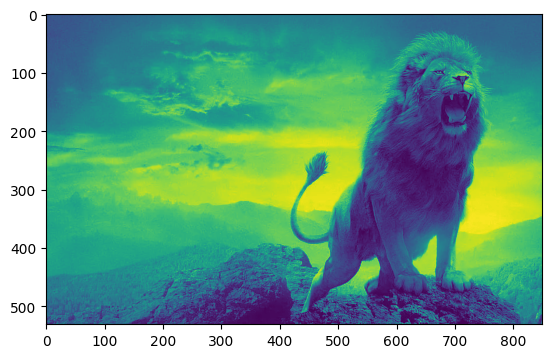

In [ ]:
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY )
plt.imshow(img_gray)
plt.show()

In [ ]:
print(img_gray.shape)

(531, 850)


In [ ]:
print(img_gray)


[[ 71  68  65 ...  75  79  84]
 [ 64  61  57 ...  72  71  76]
 [ 64  61  57 ...  72  71  75]
 ...
 [ 43  23  30 ...  21  30 129]
 [ 38  24  30 ...  26  54 110]
 [ 31  24  30 ...  35  75  99]]


Height and width of original image 531 850
Original Image


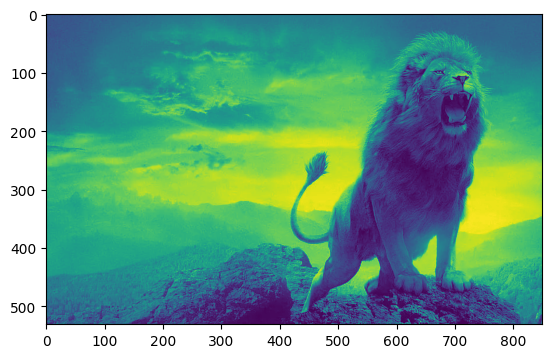

Rotated Image


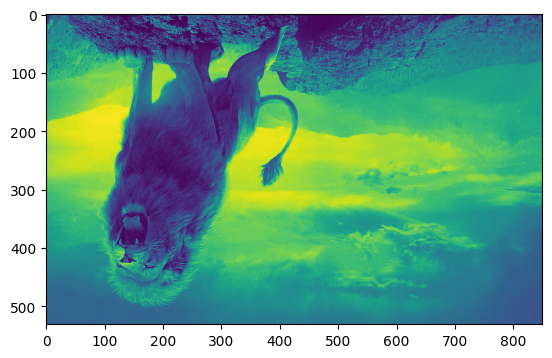

In [ ]:
# First we need to obtain the center of original image by dividing height and width by 2
height, width = img_gray.shape[:2]
print("Height and width of original image", height, width)
# get the coordinates of the center of the image to create the 2D rotation matrix
center = (width/2, height/2)
# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=180, scale=1)
# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=img_gray, M=rotate_matrix, dsize=(width, height))
print("Original Image")
plt.imshow(img_gray)
plt.show()
print("Rotated Image")
plt.imshow(rotated_image)
plt.show()

Height and width of original image 531 850
Original Image


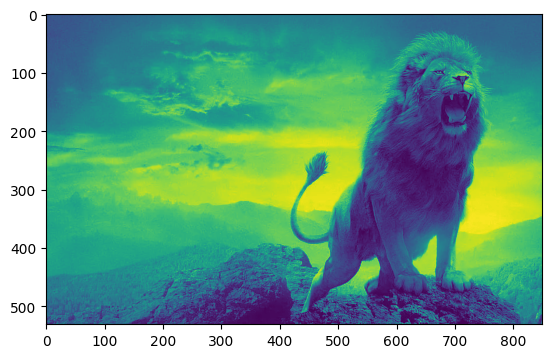

Rotated Image


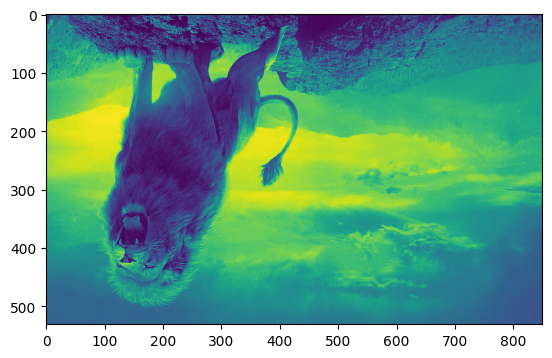

In [ ]:
# First we need to obtain the center of original image by dividing height and width by 2
height, width = img_gray.shape[:2]
print("Height and width of original image", height, width)
# get the coordinates of the center of the image to create the 2D rotation matrix
center = (width/2, height/2)
# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=180, scale=1)
# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=img_gray, M=rotate_matrix, dsize=(width, height))
print("Original Image")
plt.imshow(img_gray)
plt.show()
print("Rotated Image")
plt.imshow(rotated_image)
plt.show()


Original Image annotated with text


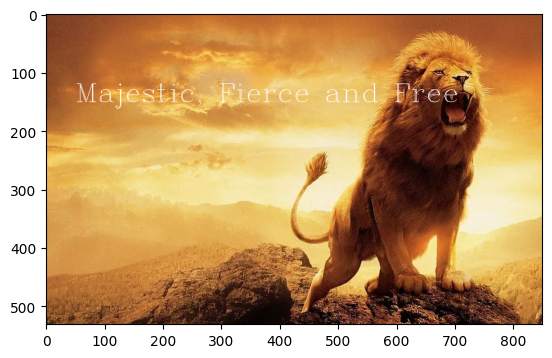

In [ ]:
#@title add text to image
imageText = img_color.copy()
text = 'Majestic, Fierce and Free'
org = (50,150) #position of text on the image
cv2.putText(imageText, text, org, fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 1.5,
color = (255,255,255))
print("Original Image annotated with text")
plt.imshow(imageText)
plt.show()

In [ ]:
#image filtering using convolutional kernels

Original Image with identity kernel applied


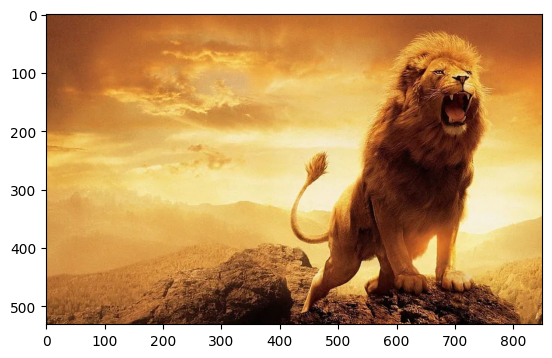

In [ ]:
#@title Image Filtering Using Convolution in OpenCV
#The identity kernel leaves the image unchanged since it acts as a filter that preserves the original pixel values.
import numpy as np
# define an identity filter or kernel
kernel1 = np.array([[0, 0, 0],
 [0, 1, 0],
 [0, 0, 0]])
#Apply the kernel to image
identity = cv2.filter2D(src=img_color, ddepth=-1, kernel=kernel1) #what is ddepth?
print("Original Image with identity kernel applied")
plt.imshow(identity)
plt.show()


Original Image with blurring kernel applied


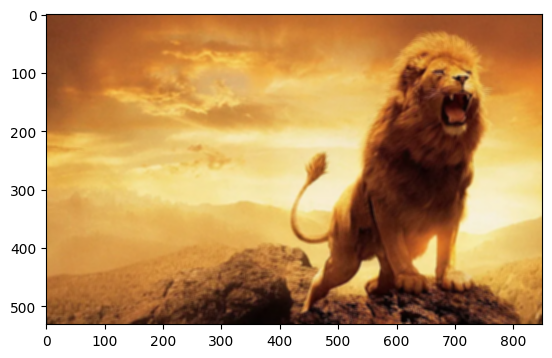

In [ ]:
#@title Apply blurring kernel
#blurring kernel here is a floating point type 5x5 matrix of all 1's, it then normzlizes
# values by dividing them by 25 (size of the matrix)
#The blurring kernel performs a simple averaging operation over a 5x5 neighborhood,
# resulting in a smoothed or blurred version of the image.
kernel2 = np.ones((5, 5), np.float32) / 25
#apply kernel
img_blurred = cv2.filter2D(src=img_color, ddepth=-1, kernel=kernel2)
print("Original Image with blurring kernel applied")
plt.imshow(img_blurred)
plt.show()


Original Image with median blur applied


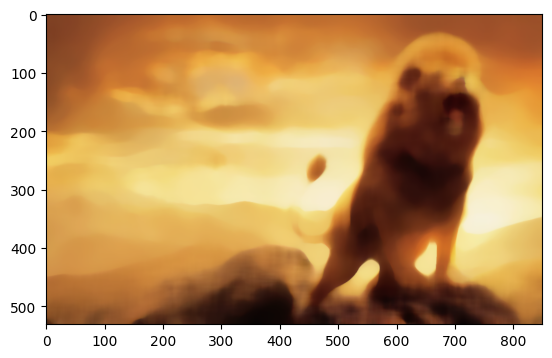

In [ ]:
#@title Applying Median blur to an image
'''
Median blur is a type of non-linear filtering.
It replaces each pixel value with the median value of its neighborhood.
src is the image file, ksize is the kernel size - the size of neighborhood window. It must be an odd
integer.
'''
median = cv2.medianBlur(src=img_color, ksize=25)
print("Original Image with median blur applied")
plt.imshow(median)
plt.show()

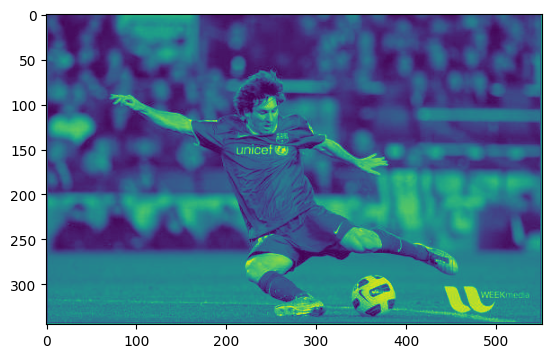

Grayscale Image with binary threshold applied


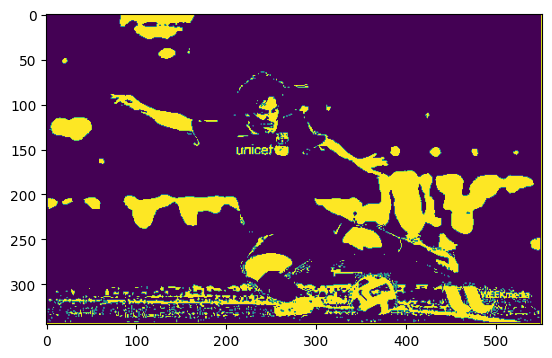

In [ ]:
#@title Image Thresholding a grayscale image to black and white
'''
Image thresholding is a common image processing technique used to separate objects
or regions of interest from the background by converting a grayscale image into a binary image.
'''
image_source ="/content/drive/MyDrive/MLPR - Y4T3/messi.jpg"
img_grayscale = cv2.imread(image_source, cv2.IMREAD_GRAYSCALE);
plt.imshow(img_grayscale)
plt.show()
# Basic threhold example
th, dst = cv2.threshold(img_grayscale, 127, 255, cv2.THRESH_BINARY);
print("Grayscale Image with binary threshold applied")
plt.imshow(dst)
plt.show()

Grayscale Image with inverse binary threshold applied


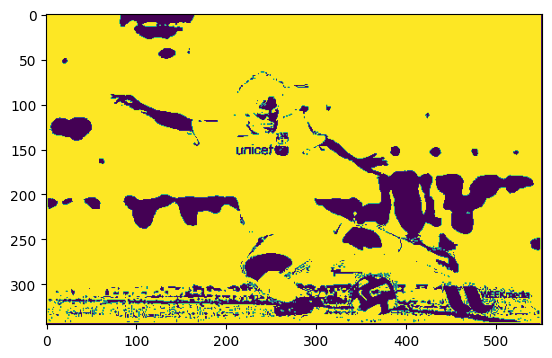

In [ ]:
# Thresholding using THRESH_BINARY_INV
'''
cv2.THRESH_BINARY_INV creates the inverse of the binary image,
where pixel values above the threshold are set to zero, and values below or equal
to the threshold are set to a maximum value.
'''
th, dst = cv2.threshold(img_grayscale,127,255, cv2.THRESH_BINARY_INV)
print("Grayscale Image with inverse binary threshold applied")
plt.imshow(dst)
plt.show()


Grayscale Image with binary threshold to zero applied


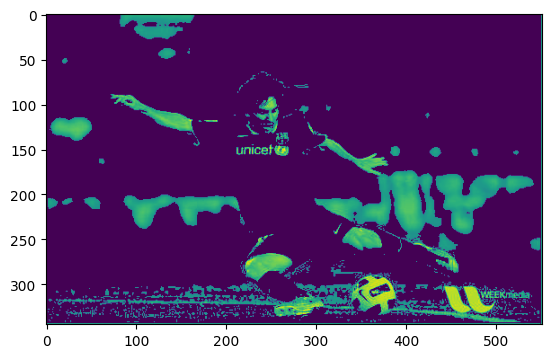

In [ ]:
# Thresholding using THRESH_TOZERO
# cv2.THRESH_TOZERO sets pixel values to zero if they are above the threshold else leaves them unchanged
th, dst = cv2.threshold(img_grayscale,127,255, cv2.THRESH_TOZERO);
print("Grayscale Image with binary threshold to zero applied")
plt.imshow(dst)
plt.show()

# Edge Detection

Canny edge detection


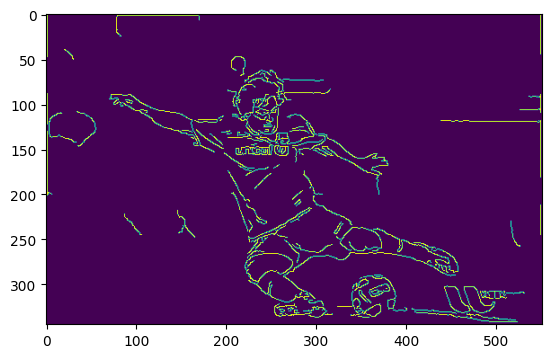

In [ ]:
# Apply Gaussian blur to the grayscale image using cv2.GaussianBlur
# with a kernel size of (3,3) to smooth the image and reduce noise.
img_blur = cv2.GaussianBlur(img_grayscale, (3,3), 0)
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
print("Canny edge detection")
plt.imshow(edges)
plt.show()

In [ ]:
chu = "/content/drive/MyDrive/MLPR - Y4T3/Screenshot 2024-03-27 154604.png"
# Read an image file using cv2
chu_grayscale = cv2.imread(chu, cv2.IMREAD_GRAYSCALE)
chu_blur = cv2.GaussianBlur(chu_grayscale, (3,3), 0)
edges = cv2.Canny(image=chu_blur, threshold1=12.5, threshold2=25)
print("Canny edge detection")
plt.imshow(edges)
plt.show()

Canny edge detection
